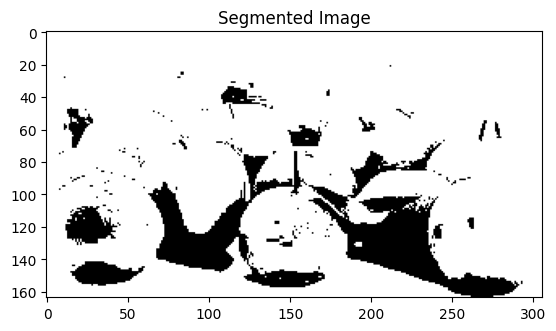

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
image = cv2.imread('image.jpeg', 0)  # Grayscale
# Apply thresholding to segment the image
_, thresh = cv2.threshold(image, 128, 255, cv2.THRESH_BINARY)
plt.imshow(thresh, cmap='gray')
plt.title('Segmented Image')
plt.show()


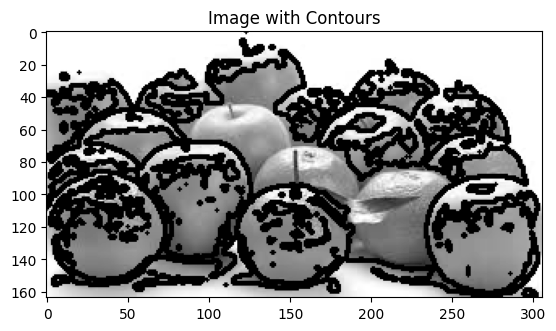

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
image = cv2.imread('image.jpeg', 0)  # Grayscale
# Apply Gaussian blur to reduce noise
blurred = cv2.GaussianBlur(image, (5, 5), 0)
# Apply adaptive thresholding
thresh = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                               cv2.THRESH_BINARY_INV, 11, 2)
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
image_with_contours = cv2.drawContours(image.copy(), contours, -1, (0, 255, 0), 2)
plt.imshow(image_with_contours, cmap='gray')
plt.title('Image with Contours')
plt.show()


Object 1:
 - Area: 22.0
 - Perimeter: 20.485281229019165
 - Bounding Box: x=294, y=159, w=9, h=5
 - Centroid: (298, 161)
Object 2:
 - Area: 0.0
 - Perimeter: 2.0
 - Bounding Box: x=110, y=156, w=2, h=1
 - Centroid: (0, 0)
Object 3:
 - Area: 29.5
 - Perimeter: 21.899494767189026
 - Bounding Box: x=174, y=153, w=7, h=8
 - Centroid: (177, 156)
Object 4:
 - Area: 0.0
 - Perimeter: 0.0
 - Bounding Box: x=99, y=153, w=1, h=1
 - Centroid: (0, 0)
Object 5:
 - Area: 31.5
 - Perimeter: 25.899494767189026
 - Bounding Box: x=4, y=151, w=11, h=6
 - Centroid: (8, 153)
Object 6:
 - Area: 112.5
 - Perimeter: 104.66904675960541
 - Bounding Box: x=54, y=150, w=44, h=10
 - Centroid: (74, 153)
Object 7:
 - Area: 0.0
 - Perimeter: 0.0
 - Bounding Box: x=286, y=149, w=1, h=1
 - Centroid: (0, 0)
Object 8:
 - Area: 2.5
 - Perimeter: 10.242640614509583
 - Bounding Box: x=63, y=148, w=5, h=2
 - Centroid: (64, 148)
Object 9:
 - Area: 16.0
 - Perimeter: 39.455843567848206
 - Bounding Box: x=201, y=146, w=16, h=8


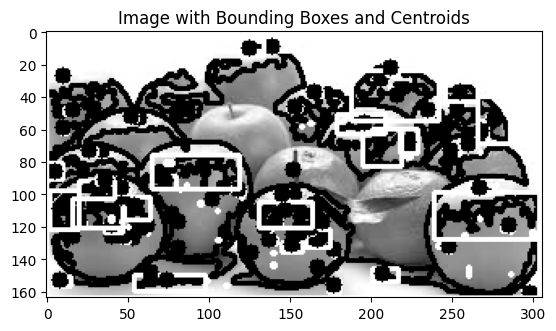

In [ ]:
# Loop through each contour to extract features
for i, contour in enumerate(contours):
    area = cv2.contourArea(contour)
    perimeter = cv2.arcLength(contour, True)
    x, y, w, h = cv2.boundingRect(contour)
    moments = cv2.moments(contour)

    if moments['m00'] != 0:
        cx = int(moments['m10'] / moments['m00'])  # Centroid X
        cy = int(moments['m01'] / moments['m00'])  # Centroid Y
    else:
        cx, cy = 0, 0

    print(f"Object {i+1}:")
    print(f" - Area: {area}")
    print(f" - Perimeter: {perimeter}")
    print(f" - Bounding Box: x={x}, y={y}, w={w}, h={h}")
    print(f" - Centroid: ({cx}, {cy})")
    cv2.rectangle(image_with_contours, (x, y), (x+w, y+h), (255, 0, 0), 2)
    if cx != 0 and cy != 0:  #
        cv2.circle(image_with_contours, (cx, cy), 5, (0, 0, 255), -1)

plt.imshow(image_with_contours, cmap='gray')
plt.title('Image with Bounding Boxes and Centroids')
plt.show()


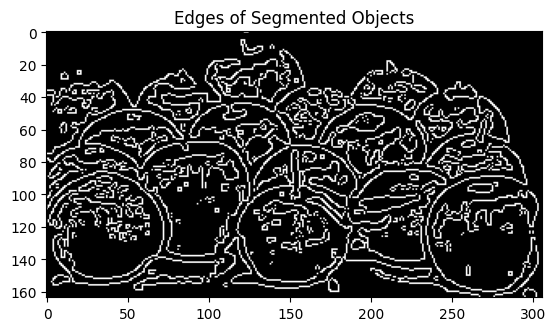

In [ ]:
# Edge detection using Canny
edges = cv2.Canny(thresh, 100, 200)
plt.imshow(edges, cmap='gray')
plt.title('Edges of Segmented Objects')
plt.show()


In [ ]:
from scipy.spatial import distance
if len(contours) > 0:
    area_ref = cv2.contourArea(contours[0])
    perimeter_ref = cv2.arcLength(contours[0], True)
    features_ref = [area_ref, perimeter_ref]
else:
    raise ValueError("No contours found to use as a reference object.")

# Define a similarity threshold
threshold = 10
for i, contour in enumerate(contours):
    area = cv2.contourArea(contour)
    perimeter = cv2.arcLength(contour, True)
    features_obj = [area, perimeter]
    dist = distance.euclidean(features_ref, features_obj)
    print(f"Distance from reference for Object {i+1}: {dist}")
    if dist < threshold:
        print(f"Object {i+1} is similar to the reference object!")



Distance from reference for Object 1: 0.0
Object 1 is similar to the reference object!
Distance from reference for Object 2: 28.735093911729752
Distance from reference for Object 3: 7.632168756752101
Object 3 is similar to the reference object!
Distance from reference for Object 4: 30.060717673269295
Distance from reference for Object 5: 10.934519113198432
Distance from reference for Object 6: 123.60079441050821
Distance from reference for Object 7: 30.060717673269295
Distance from reference for Object 8: 22.026386148390326
Distance from reference for Object 9: 19.896789576496978
Distance from reference for Object 10: 24.370907296438958
Distance from reference for Object 11: 24.694602087982204
Distance from reference for Object 12: 28.209298087137746
Distance from reference for Object 13: 30.060717673269295
Distance from reference for Object 14: 28.735093911729752
Distance from reference for Object 15: 27.453075458053128
Distance from reference for Object 16: 22.925281704986006
Distanc

Object 1 is a match!
Object 2 is a match!
Object 3 is a match!
Object 4 is a match!
Object 5 is a match!
Object 7 is a match!
Object 8 is a match!
Object 9 is a match!
Object 10 is a match!
Object 11 is a match!
Object 12 is a match!
Object 13 is a match!
Object 14 is a match!
Object 15 is a match!
Object 16 is a match!
Object 17 is a match!
Object 18 is a match!
Object 19 is a match!
Object 20 is a match!
Object 21 is a match!
Object 22 is a match!
Object 23 is a match!
Object 24 is a match!
Object 25 is a match!
Object 26 is a match!
Object 27 is a match!
Object 28 is a match!
Object 29 is a match!
Object 30 is a match!
Object 31 is a match!
Object 32 is a match!
Object 33 is a match!
Object 34 is a match!
Object 35 is a match!
Object 36 is a match!
Object 37 is a match!
Object 38 is a match!
Object 39 is a match!
Object 40 is a match!
Object 41 is a match!
Object 42 is a match!
Object 43 is a match!
Object 44 is a match!
Object 45 is a match!
Object 46 is a match!
Object 47 is a mat

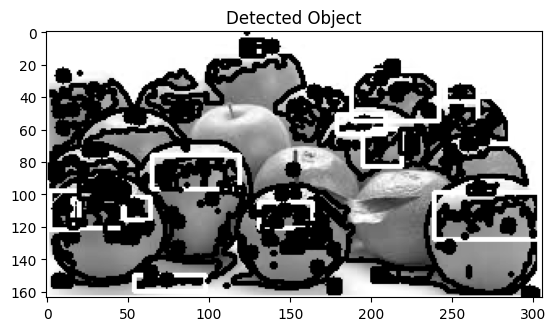

In [ ]:
threshold = 50
for i, contour in enumerate(contours):
    area = cv2.contourArea(contour)
    perimeter = cv2.arcLength(contour, True)
    features_obj = [area, perimeter]
    dist = distance.euclidean(features_ref, features_obj)

    if dist < threshold:
        x, y, w, h = cv2.boundingRect(contour)
        cv2.rectangle(image_with_contours, (x, y), (x+w, y+h), (0, 255, 0), 2)
        print(f"Object {i+1} is a match!")

plt.imshow(image_with_contours, cmap='gray')
plt.title('Detected Object')
plt.show()


In [ ]:
import pandas as pd
data = []
for i, contour in enumerate(contours):
    area = cv2.contourArea(contour)
    perimeter = cv2.arcLength(contour, True)
    x, y, w, h = cv2.boundingRect(contour)
    moments = cv2.moments(contour)
    if moments['m00'] != 0:
        cx = int(moments['m10'] / moments['m00'])
        cy = int(moments['m01'] / moments['m00'])
    else:
        cx, cy = None, None

    data.append([i+1, area, perimeter, x, y, w, h, cx, cy])

# DataFrame
df = pd.DataFrame(data, columns=['Object', 'Area', 'Perimeter', 'X', 'Y', 'Width', 'Height', 'Centroid_X', 'Centroid_Y'])
# Save to CSV
df.to_csv('labeledobjects.csv', index=False)
print(df)


     Object     Area    Perimeter    X    Y  Width  Height  Centroid_X  \
0         1     22.0    20.485281  294  159      9       5       298.0   
1         2      0.0     2.000000  110  156      2       1         NaN   
2         3     29.5    21.899495  174  153      7       8       177.0   
3         4      0.0     0.000000   99  153      1       1         NaN   
4         5     31.5    25.899495    4  151     11       6         8.0   
..      ...      ...          ...  ...  ...    ...     ...         ...   
120     121     20.0    26.142135  210   18      7       9       212.0   
121     122  12657.5  3456.896863    0   12    304     152       152.0   
122     123      2.0     6.000000  138    9      3       2       139.0   
123     124     32.5    41.213203  120    5     14      10       125.0   
124     125      0.0     0.000000  123    0      1       1         NaN   

     Centroid_Y  
0         161.0  
1           NaN  
2         156.0  
3           NaN  
4         153.0  
.. 

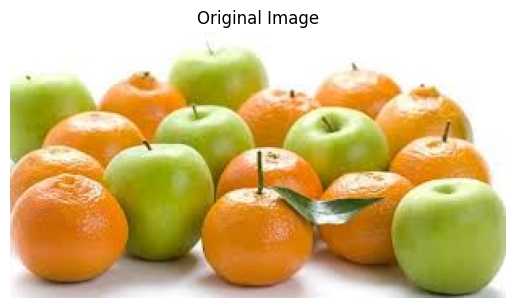

In [ ]:
import cv2
import matplotlib.pyplot as plt
image_path = "image.jpeg"
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.title("Original Image")
plt.axis("off")
plt.show()


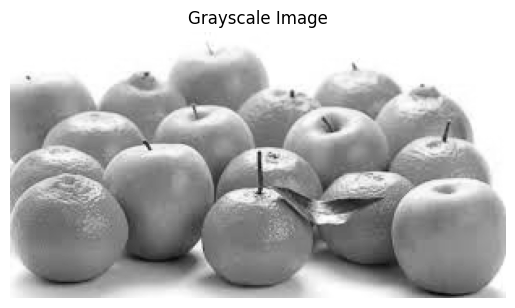

In [ ]:
# Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
plt.imshow(gray_image, cmap='gray')
plt.title("Grayscale Image")
plt.axis("off")
plt.show()


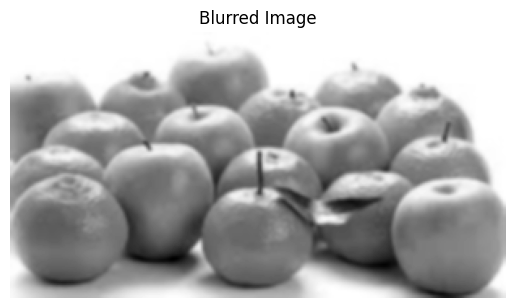

In [ ]:
# Apply Gaussian blur to the grayscale image
blurred_image = cv2.GaussianBlur(gray_image, (5, 5), 0)
plt.imshow(blurred_image, cmap='gray')
plt.title("Blurred Image")
plt.axis("off")
plt.show()


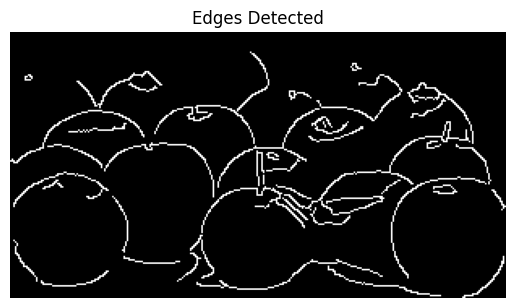

In [ ]:
# Canny edge detector
edges = cv2.Canny(blurred_image, threshold1=100, threshold2=200)
plt.imshow(edges, cmap='gray')
plt.title("Edges Detected")
plt.axis("off")
plt.show()


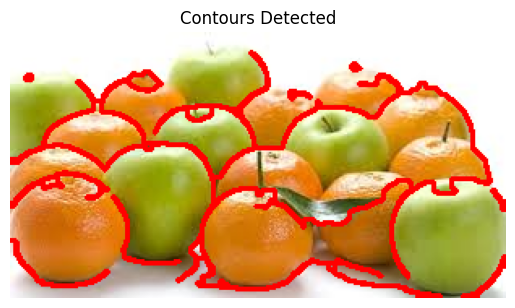

In [ ]:

kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))
morph_edges = cv2.morphologyEx(edges, cv2.MORPH_CLOSE, kernel)
contours, _ = cv2.findContours(morph_edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contour_image = image.copy()
cv2.drawContours(contour_image, contours, -1, (255, 0, 0), 2)
plt.imshow(contour_image)
plt.title("Contours Detected")
plt.axis("off")
plt.show()


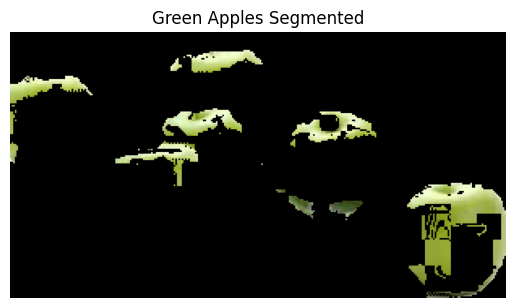

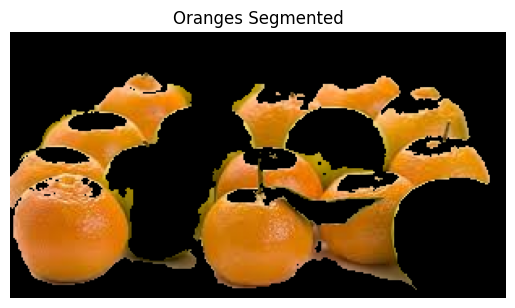

In [ ]:
hsv_image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
lower_green = np.array([35, 40, 40])
upper_green = np.array([85, 255, 255])
lower_orange = np.array([10, 100, 20])
upper_orange = np.array([25, 255, 255])
mask_green = cv2.inRange(hsv_image, lower_green, upper_green)
mask_orange = cv2.inRange(hsv_image, lower_orange, upper_orange)
green_segment = cv2.bitwise_and(image, image, mask=mask_green)
orange_segment = cv2.bitwise_and(image, image, mask=mask_orange)

plt.imshow(green_segment)
plt.title("Green Apples Segmented")
plt.axis("off")
plt.show()
plt.imshow(orange_segment)
plt.title("Oranges Segmented")
plt.axis("off")
plt.show()


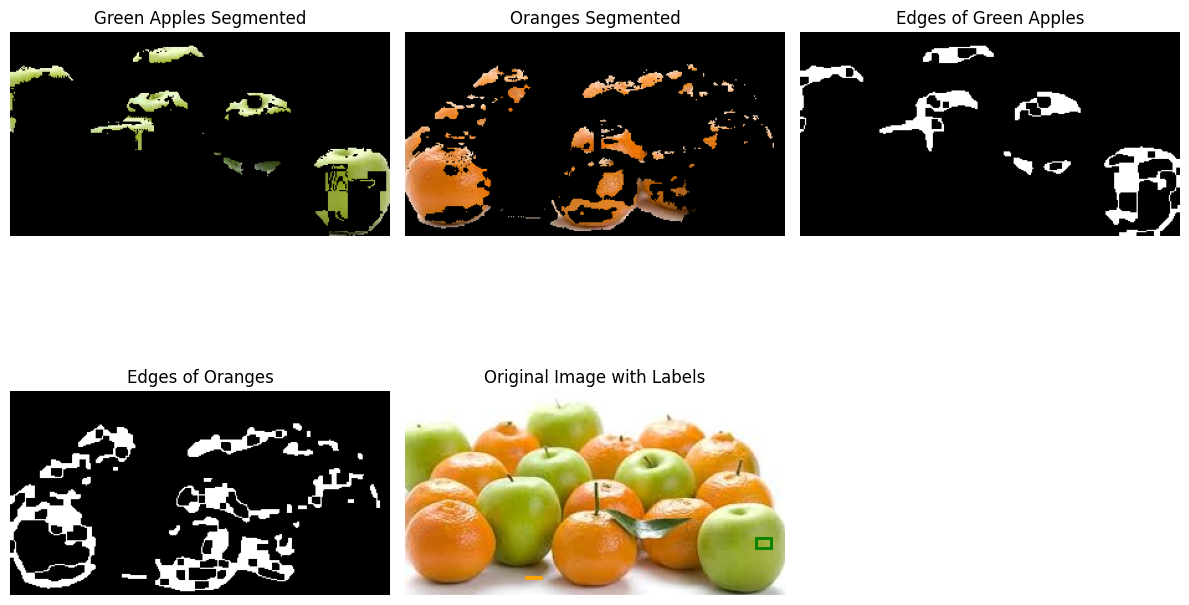

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = "image.jpeg"
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB

# Convert to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

# Apply Gaussian blur
blurred_image = cv2.GaussianBlur(gray_image, (5, 5), 0)

# Use Canny edge detector
edges = cv2.Canny(blurred_image, threshold1=100, threshold2=200)

# Apply morphological operations
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))
morph_edges = cv2.morphologyEx(edges, cv2.MORPH_CLOSE, kernel)

# Find contours
contours, _ = cv2.findContours(morph_edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Draw contours on the original image
contour_image = image.copy()
cv2.drawContours(contour_image, contours, -1, (255, 0, 0), 2)

# Convert to HSV
hsv_image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)

# Define color ranges
lower_green = np.array([35, 40, 40])
upper_green = np.array([85, 255, 255])
lower_orange = np.array([5, 50, 50])
upper_orange = np.array([15, 255, 255])

# Create masks
mask_green = cv2.inRange(hsv_image, lower_green, upper_green)
mask_orange = cv2.inRange(hsv_image, lower_orange, upper_orange)

# Apply masks
green_segment = cv2.bitwise_and(image, image, mask=mask_green)
orange_segment = cv2.bitwise_and(image, image, mask=mask_orange)

# Blur the masks
blurred_green_segment = cv2.GaussianBlur(green_segment, (5, 5), 0)
blurred_orange_segment = cv2.GaussianBlur(orange_segment, (5, 5), 0)

# Edge detection on the blurred masks
edges_green = cv2.Canny(blurred_green_segment, 50, 150)
edges_orange = cv2.Canny(blurred_orange_segment, 50, 150)

# Morphological operations to clean up the edges
morph_edges_green = cv2.morphologyEx(edges_green, cv2.MORPH_CLOSE, kernel)
morph_edges_orange = cv2.morphologyEx(edges_orange, cv2.MORPH_CLOSE, kernel)

# Extract features from segmented objects
def extract_features(segment, mask):
    # Convert to grayscale
    gray_segment = cv2.cvtColor(segment, cv2.COLOR_RGB2GRAY)
    # Find contours
    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    features = []
    for contour in contours:
        # Calculate area
        area = cv2.contourArea(contour)
        # Calculate perimeter
        perimeter = cv2.arcLength(contour, True)
        # Calculate bounding box
        x, y, w, h = cv2.boundingRect(contour)
        bounding_box = (x, y, w, h)
        # Calculate centroid
        M = cv2.moments(contour)
        if M["m00"] != 0:
            cx = int(M["m10"] / M["m00"])
            cy = int(M["m01"] / M["m00"])
        else:
            cx, cy = 0, 0
        centroid = (cx, cy)
        # Extract edge features
        edge_features = cv2.Canny(gray_segment[y:y+h, x:x+w], 50, 150)
        # Extract texture features
        glcm = cv2.calcHist([gray_segment[y:y+h, x:x+w]], [0], None, [256], [0, 256])
        texture_features = glcm.flatten()
        # Extract color features
        color_features = cv2.calcHist([segment[y:y+h, x:x+w]], [0, 1, 2], None, [8, 8, 8], [0, 256, 0, 256, 0, 256])
        color_features = color_features.flatten()

        features.append({
            "area": area,
            "perimeter": perimeter,
            "bounding_box": bounding_box,
            "centroid": centroid,
            "edge_features": edge_features,
            "texture_features": texture_features,
            "color_features": color_features
        })
    return features

green_features = extract_features(green_segment, mask_green)
orange_features = extract_features(orange_segment, mask_orange)

# Function to compare features for object detection
def compare_features(reference_features, target_features):
    matches = []
    for ref_feat in reference_features:
        for tgt_feat in target_features:
            distance = np.linalg.norm(np.array(ref_feat["color_features"]) - np.array(tgt_feat["color_features"]))
            matches.append((distance, tgt_feat))
    matches.sort(key=lambda x: x[0])
    return matches[0][1] if matches else None

# Detect and label objects
detected_object_green = compare_features(green_features, green_features)
detected_object_orange = compare_features(orange_features, orange_features)

# Visualize the results
plt.figure(figsize=(12, 8))

plt.subplot(2, 3, 1)
plt.imshow(green_segment)
plt.title("Green Apples Segmented")
plt.axis("off")

plt.subplot(2, 3, 2)
plt.imshow(orange_segment)
plt.title("Oranges Segmented")
plt.axis("off")

plt.subplot(2, 3, 3)
plt.imshow(morph_edges_green, cmap='gray')
plt.title("Edges of Green Apples")
plt.axis("off")

plt.subplot(2, 3, 4)
plt.imshow(morph_edges_orange, cmap='gray')
plt.title("Edges of Oranges")
plt.axis("off")

plt.subplot(2, 3, 5)
plt.imshow(image)
plt.title("Original Image with Labels")
if detected_object_green:
    x, y, w, h = detected_object_green["bounding_box"]
    plt.gca().add_patch(plt.Rectangle((x, y), w, h, edgecolor='g', facecolor='none', linewidth=2))
if detected_object_orange:
    x, y, w, h = detected_object_orange["bounding_box"]
    plt.gca().add_patch(plt.Rectangle((x, y), w, h, edgecolor='orange', facecolor='none', linewidth=2))
plt.axis("off")

plt.tight_layout()
plt.show()
